In [1]:
from Node.Node import Control_node
from Plant.Plant import Plant
from Node.functions import *
import numpy as np
import time
import pylab as pl
from IPython import display
import matplotlib.pyplot as plt

#### Expectation Adjustment

Both agents update their behaviors randomly proportionally to perceived error, with the blue agent also adjusting expectations/reference signals proportionally to error, trailing the behavior of the other agent (trying to match expectations with behavior of others).

In [30]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[1]])
B2 = np.array([[1]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[1]])
A2 = np.array([[1]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.6])
R2 = np.array([-0.2])

# Initial behavior
behav_1 = np.array([0.5])
behav_2 = np.array([-0.4])

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])


# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    control_signal = chaotic_controller(behavioral_model, 0.1, error)
    return control_signal

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# adjusts reference given error
def reference_update_true(reference, error):
    k = 0.05
    reference = reference - (error * k)
    return reference

# does not adjust reference
def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate


agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)
plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

#### Two Agent Experiment

The green and blue dots represent the changing behaviors of each agent along the x-axis (opacity and y-position relative to the x-axis represent time) while the dots encircled in red represent reference signals. Notice how the green agent's reference signal (expectation of the other agent) does not change, but that of the blue agent's does. 

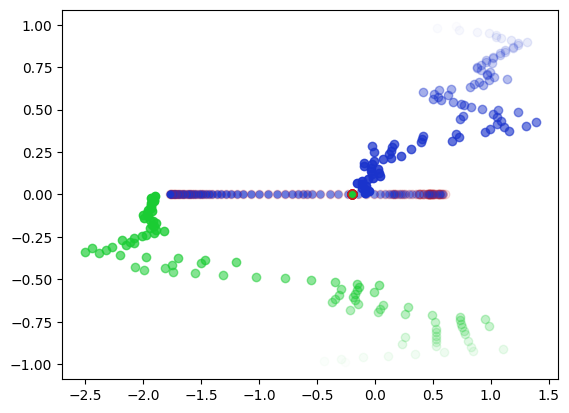

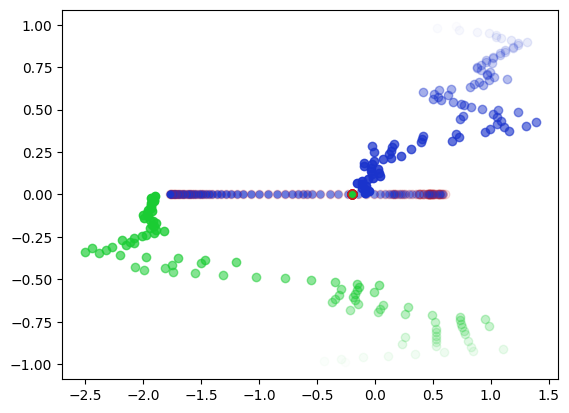

In [31]:
%matplotlib inline
np.random.seed(2)
trials = 100
color = (0.1,0.2,0.8,0.1)
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

for t in range(trials):
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(agent1.get_reference()[0],0, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
    pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[1]])
    b1_control = agent1.go(b2)   
    b2_control = agent2.go(b1)

    b1 = plant1.transition(b1_control)
    b2 = plant2.transition(b2_control)

    agent1_behaviors.append(b1)
    agent2_behaviors.append(b2)

    agent1_error.append(np.absolute(agent1.get_error()))
    agent2_error.append(np.absolute(agent2.get_error()))
    
    
    pl.scatter(b1[0],1-(t+1)/(trials+1),c=tuple(color1))
    pl.scatter(b2[0],-1+(t+1)/(trials+1),c=tuple(color2))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #time.sleep(0.1)


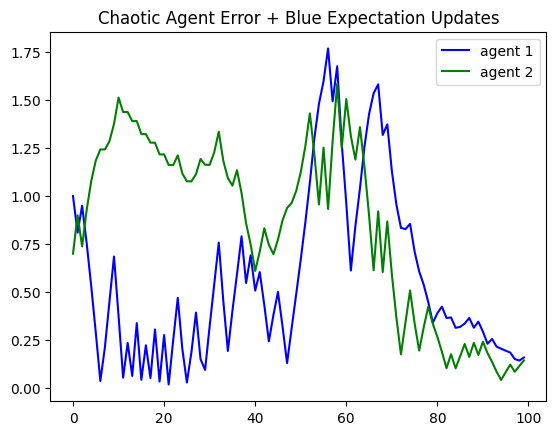

In [32]:
t = [n for n in range(trials)]
plt.plot(t, agent1_error, 'b',label="agent 1")
plt.plot(t, agent2_error, 'g', label="agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Chaotic Agent Error + Blue Expectation Updates")
plt.show()

#### Both Agents update Expectations to Match Observed Behaviors



In [26]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[1]])
B2 = np.array([[1]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[1]])
A2 = np.array([[1]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.6])
R2 = np.array([-0.2])

# Initial behavior
behav_1 = np.array([0.5])
behav_2 = np.array([-0.4])

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])


# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    control_signal = chaotic_controller(behavioral_model, 0.1, error)
    return control_signal

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    return new_state

# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# adjusts reference given error
def reference_update_true(reference, error):
    k = 0.05
    reference = reference - (error * k)
    return reference

# does not adjust reference
def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate


agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)
plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

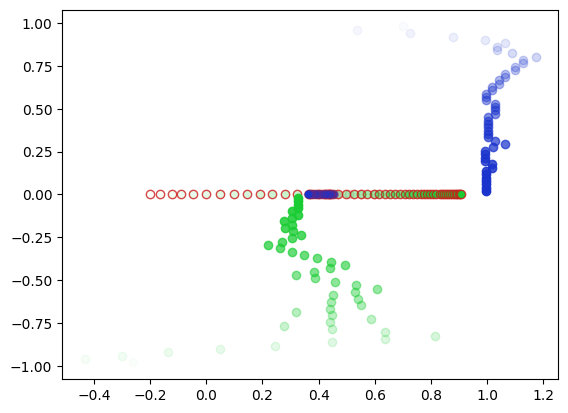

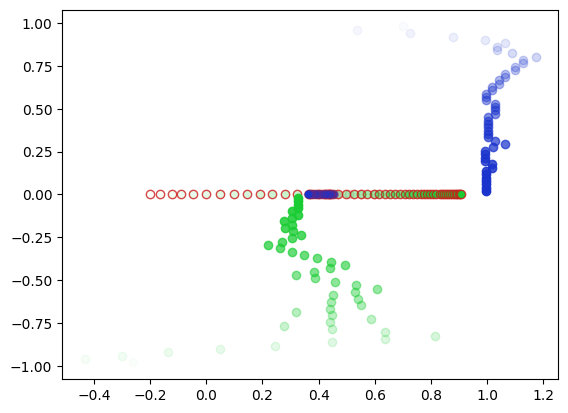

In [27]:
%matplotlib inline
np.random.seed(2)
trials = 50
color = (0.1,0.2,0.8,0.1)
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

for t in range(trials):
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(agent1.get_reference()[0],0, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
    pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[1]])
    b1_control = agent1.go(b2)   
    b2_control = agent2.go(b1)

    b1 = plant1.transition(b1_control)
    b2 = plant2.transition(b2_control)

    agent1_behaviors.append(b1)
    agent2_behaviors.append(b2)

    agent1_error.append(np.absolute(agent1.get_error()))
    agent2_error.append(np.absolute(agent2.get_error()))
    
    
    pl.scatter(b1[0],1-(t+1)/(trials+1),c=tuple(color1))
    pl.scatter(b2[0],-1+(t+1)/(trials+1),c=tuple(color2))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #time.sleep(0.1)


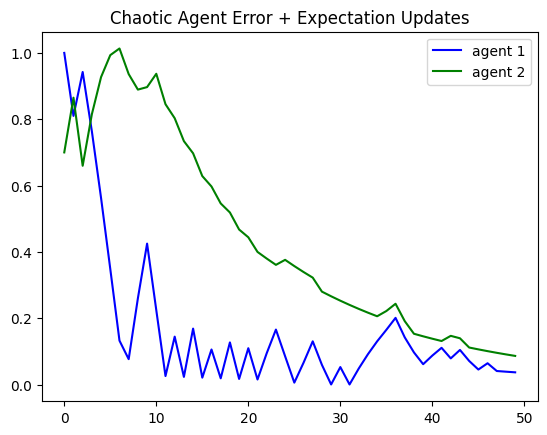

In [29]:
t = [n for n in range(trials)]
plt.plot(t, agent1_error, 'b',label="agent 1")
plt.plot(t, agent2_error, 'g', label="agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Chaotic Agent Error + Expectation Updates")
plt.show()

#### Unexpected Spike

In [59]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[1]])
B2 = np.array([[1]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[1]])
A2 = np.array([[1]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.6])
R2 = np.array([-0.2])

# Initial behavior
behav_1 = np.array([0.5])
behav_2 = np.array([-0.4])

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])


# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    control_signal = chaotic_controller(behavioral_model, 0.1, error)
    return control_signal

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    return new_state

# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# adjusts reference given error
def reference_update_true(reference, error):
    k = 0.05
    reference = reference - (error * k)
    return reference

# does not adjust reference
def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate


agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)
plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

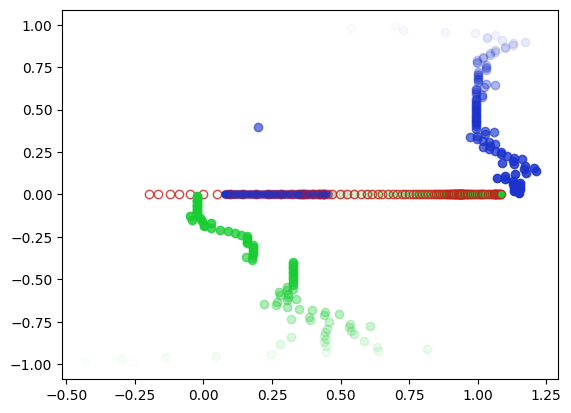

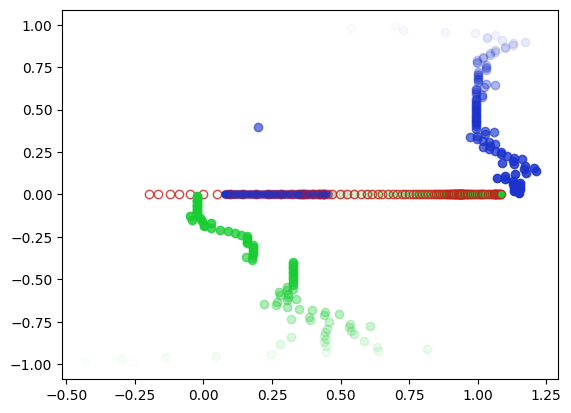

In [60]:
%matplotlib inline
np.random.seed(2)
trials = 100
color = (0.1,0.2,0.8,0.1)
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

for t in range(trials):
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(agent1.get_reference()[0],0, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
    pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[1]])
    b1_control = agent1.go(b2)   
    b2_control = agent2.go(b1)

    b1 = plant1.transition(b1_control)
    b2 = plant2.transition(b2_control)

    agent1_behaviors.append(b1)
    agent2_behaviors.append(b2)

    agent1_error.append(np.absolute(agent1.get_error()))
    agent2_error.append(np.absolute(agent2.get_error()))

    if t == 60:
        b1 = np.array([0.2])
    
    
    pl.scatter(b1[0],1-(t+1)/(trials+1),c=tuple(color1))
    pl.scatter(b2[0],-1+(t+1)/(trials+1),c=tuple(color2))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #time.sleep(0.1)


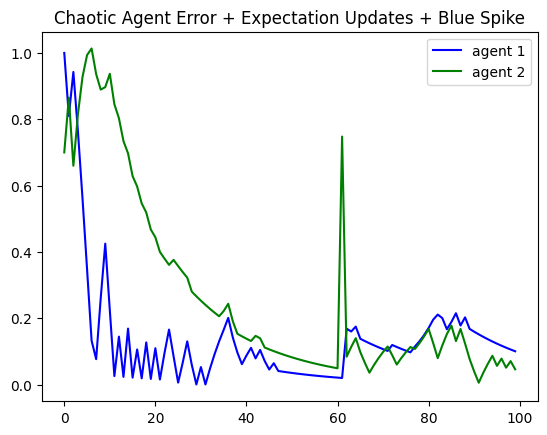

In [61]:
t = [n for n in range(trials)]
plt.plot(t, agent1_error, 'b',label="agent 1")
plt.plot(t, agent2_error, 'g', label="agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Chaotic Agent Error + Expectation Updates + Blue Spike")
plt.show()